<a href="https://colab.research.google.com/github/AudioburstResearch/sequitur-g2p/blob/master/duplicate_visualizations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
path = 'drive/My Drive/bursts_list_for_tagging_200_210 - 21 April.tsv'
data = pd.read_csv(path, encoding='utf8', sep = '\t')

In [ ]:

data['unique_playlist'] = data.apply(lambda row: str(row.playlist_id) + 
                                  row.date, axis = 1) 
playlist_names = data.unique_playlist.unique()
playlist_lens = []
dups = []
for playlist in playlist_names:
    playlist_frame = data.loc[data['unique_playlist'] == playlist]
    playlist_frame = playlist_frame.reset_index()
    stories = playlist_frame.story.unique()
    playlist_lens.append(playlist_frame.shape[0])
    dups.append(playlist_frame.shape[0]-len(stories))
TP =[ 3,0,15,4,0,2,0,2,3,1,3,6,0,2,2,0,3,0,0,1,0,4,1,0,2,3,1,7,5,2,2]
FP = [6,10,3,7,6,9,3,4,2,10,3,5,3,3,0,3,3,5,5,3,6,4,3,4,2,6,3,2,4,3,2]




df = pd.DataFrame(list(zip(playlist_names, dups, TP, FP)), columns=["playlist_name",  "duplicates in playlist", "true positive", "false positive"])

In [ ]:

print(np.var(TP))
m = sum(TP) / len(TP)
print(m)


print(np.var(FP))
m = sum(FP) / len(FP)
print(m)

8.624349635796046
2.3870967741935485
5.352757544224767
4.258064516129032


In [ ]:
df

,playlist_name,bursts,dups
0,20021/04/2020,17,3
1,20029/04/2020,24,3
2,20010/05/2020,36,16
3,20121/04/2020,18,4
4,20129/04/2020,14,1
5,20110/05/2020,23,4
6,20221/04/2020,15,1
7,20229/04/2020,17,4
8,20210/05/2020,16,3
9,20321/04/2020,18,4


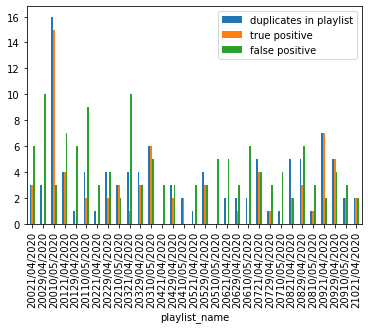

In [ ]:
df.plot.bar(x = 0, y = [1, 2, 3])